<a href="https://colab.research.google.com/github/rodrigonavas/statistics-and-calculus/blob/master/descent_of_the_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo de descenso del gradiente

In [ ]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

cm_color = cm.viridis

###Función de coste

In [ ]:
def f(x, y):
  return x**2 + y**2 

###Gráfica en 3D de la función de coste

In [ ]:
def get_points_and_visualize(domain, func):
  x = np.linspace(domain[0], domain[1], 100)
  y = np.linspace(domain[0], domain[1], 100)
  x, y = np.meshgrid(x, y)

  z = func(x, y)

  fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

  surf = ax.plot_surface(x, y, z, cmap = cm_color)
  fig.colorbar(surf)
  return (x, y, z)

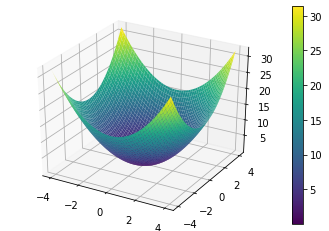

In [ ]:
points = get_points_and_visualize((-4, 4), f)

#Descenso del gradiente

###Gráfica de visualización inicial

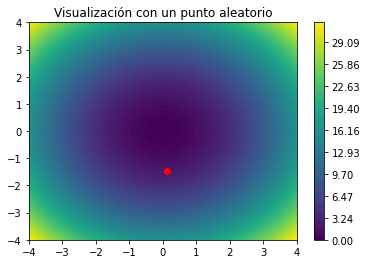

In [ ]:
level_map = np.linspace(np.min(points[2]), np.max(points[2]), 100)
plt.contourf(points[0], points[1], points[2], levels=level_map, cmap=cm_color)
plt.colorbar()
plt.title("Visualización con un punto aleatorio")

#Generar un punto aleatorio
p = np.random.rand(2) * 8 - 4
plt.plot(p[0], p[1], 'o', c = 'r')

Función para calcular el cambio de dirección del punto y que da como resultado el descenso del gradiente

In [ ]:
def gradient(p, func):
  #variable muy cercana a cero para calcular la derivada
  h = 0.01
  grad = np.zeros(2)

  for idx, val in enumerate(p):
      cp = np.copy(p)
      cp[idx] += h

      #calcular la derivada de parcial para las dos dimensiones x, y
      dp = (func(cp[0], cp[1]) - func(p[0], p[1])) / h
      grad[idx] = dp
  return grad

Proceso para descender el gradiente
Se usara una variable de aprendizaje = 0.01

In [ ]:
def apply_gradient_and_visualize(points, f):

  learning_rate = 0.01  

  level_map = np.linspace(np.min(points[2]), np.max(points[2]), 100)
  plt.contourf(points[0], points[1], points[2], levels=level_map, cmap=cm_color)
  plt.colorbar()
  plt.title("Descenso del gradiente")

  #Graficar el primer punto aleatorio
  p = np.random.rand(2) * 8 - 4
  plt.plot(p[0], p[1], 'o', c = 'darkorange', label = 'Start')

  for i in range(200):
    p = p - learning_rate * gradient(p, f)
    if i % 10 == 0:
      plt.plot(p[0], p[1], '.', c = 'w')

  plt.plot(p[0], p[1], 'o', c = 'r', label = 'End')

  plt.legend()
  print(f'The final value of the point p: {p}')

Función anterior aplicada, cada vez con un punto aleatorio diferente y siempre buscando un mínimo local hasta un valor cercano al x, y = (0, 0)

The final value of the point p: [-0.005 -0.005]


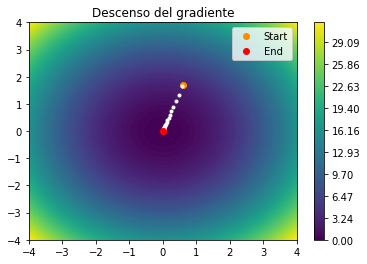

In [ ]:
apply_gradient_and_visualize(points, f)

Es posible declarar cualquier función de 3 dimensiones y realizar el mismo proceso

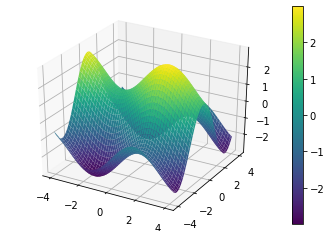

In [ ]:
def f_trigon(x, y):
  return np.sin(x) + 2 * np.cos(y)

trigon_points = get_points_and_visualize((-4, 4), f_trigon)

The final value of the point p: [ -7.1552085  -13.04438351]


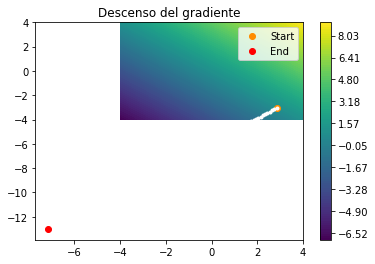

In [ ]:
apply_gradient_and_visualize(trigon_points, f_trigon)

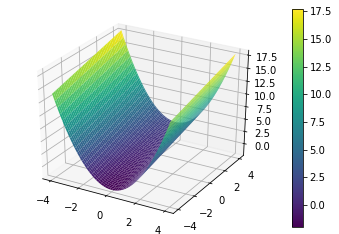

In [ ]:
def f2(x, y):
  return x**2 + y**1/2

points_2 = get_points_and_visualize((-4, 4), f2)

The final value of the point p: [ 0.02154721 -3.27057189]


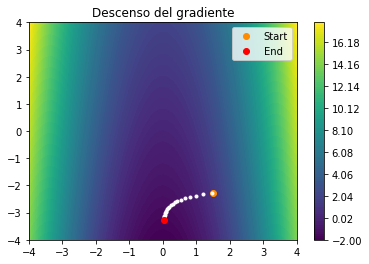

In [ ]:
apply_gradient_and_visualize(points_2, f2)